In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles, cycler
from tueplots.constants.color import rgb
from tueplots import figsizes
from tueplots.constants.color import palettes

# Update global settings with JMLR base and your customizations
plt.rcParams.update(bundles.jmlr2001())
# Additional customizations for 12 pt font
plt.rcParams.update({"font.size": 12})

### Get the data

In [2]:
data = {
    'CL_Y': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
             4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    'V': [3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
    'S': [100, 500, 1000, 10000] * 9,
    'ANN': [0.2267, 0.2667, 0.2067, 0.2170, 0.2667, 0.2367, 0.2467, 0.2110, 0.2666, 0.2700, 0.2067, 0.2060,
            0.2600, 0.3667, 0.3000, 0.3287, 0.2000, 0.3733, 0.3253, 0.3373, 0.1667, 0.3933, 0.3200, 0.3373,
            0.3467, 0.4000, 0.4567, 0.4803, 0.4000, 0.4867, 0.5133, 0.4443, 0.4333, 0.5267, 0.4767, 0.4633],
    'DT': [0.2333, 0.3000, 0.2167, 0.2357, 0.2777, 0.2333, 0.2487, 0.2540, 0.2555, 0.2300, 0.3200, 0.2540,
           0.3867, 0.4333, 0.3998, 0.3933, 0.4000, 0.4467, 0.3910, 0.4493, 0.2667, 0.4933, 0.3544, 0.4493,
           0.4467, 0.4667, 0.4999, 0.5280, 0.5000, 0.5600, 0.5355, 0.5527, 0.5000, 0.5867, 0.5103, 0.5597],
    'LR': [0.2000, 0.2000, 0.2170, 0.2170, 0.1800, 0.1800, 0.2060, 0.2060, 0.1667, 0.1667, 0.2060, 0.2060,
           0.2267, 0.3333, 0.3267, 0.3323, 0.2333, 0.3800, 0.3220, 0.3410, 0.1667, 0.5200, 0.3300, 0.3410,
           0.3733, 0.4333, 0.4899, 0.4899, 0.4000, 0.5067, 0.4657, 0.4657, 0.4333, 0.5200, 0.4900, 0.4900]
}

table3_orig = pd.DataFrame(data)
table3_orig['S'] = pd.factorize(table3_orig['S'], sort = True)[0]

In [3]:
table3 = pd.read_csv('../dat/table3.csv')
table3['Sample_Size'] = table3['Sample_Size'].factorize()[0]
models = ['ANN', 'DT', 'LR']

### Figure 1 -- All in one plot

In [4]:
# Plot 1
by_CLY = table3.groupby('Classes_Dep_Var')[models].mean().mean(axis=1)
by_CLY_orig = table3_orig.groupby('CL_Y')[models].mean().mean(axis=1)
# Plot 2
by_S = table3.groupby('Sample_Size')[models].mean().mean(axis=1)
by_S_orig = table3_orig.groupby('S')[models].mean().mean(axis=1)
# Plot 3
by_V = table3.groupby('Num_Ind_Vars')[models].mean().mean(axis=1)
by_V_orig = table3_orig.groupby('V')[models].mean().mean(axis=1)
# Plot 4
by_M = table3[models + ['RF']].mean()
by_M_orig = table3_orig[models].mean()

sig = 0.27 # Significance star y-position
alpha_val = 0.5 # opacity level

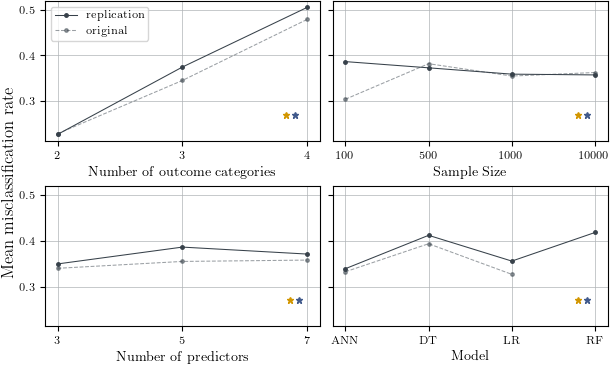

In [6]:
plt.rcParams.update(figsizes.jmlr2001(nrows=2, ncols=2))

fig, axs = plt.subplots(2, 2, sharey = True)

# Plot 1: CLY
axs[0, 0].plot(by_CLY.index, by_CLY.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 0].plot(by_CLY_orig.index, by_CLY_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].plot(3.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 2: S
axs[0, 1].plot(by_S.index, by_S.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 1].plot(by_S_orig.index, by_S_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 1].set_xlabel("Sample Size")
axs[0, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[0, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 1].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 3: V
axs[1, 0].plot(by_V.index, by_V.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 0].plot(by_V_orig.index, by_V_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 0].set_xticks([3, 5, 7])  # Positions for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].set_xlabel("Number of predictors")
axs[1, 0].plot(6.73, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 0].plot(6.87, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 4: CLY x S
axs[1, 1].plot(by_M.index, by_M.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 1].plot(by_M_orig.index, by_M_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 1].set_xlabel("Model")
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 1].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

axs[0, 0].legend()
fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/01_mainEffects_cont.pdf")
plt.show()

### Interactions in Continuous Case -- All in one plot

In [8]:
# M x CLY
M_CLY = table3.groupby('Classes_Dep_Var')[models].mean()
M_CLY_orig = table3_orig.groupby(['CL_Y'])[models].mean()
# M x S
M_S = table3.groupby('Sample_Size')[models].mean()
M_S_orig = table3_orig.groupby(['S'])[models].mean()
# M x V
M_V = table3.groupby('Num_Ind_Vars')[models].mean()
M_V_orig = table3_orig.groupby(['V'])[models].mean()
# CLY x S
CLY_S = table3.groupby(['Classes_Dep_Var', 'Sample_Size'])[models].mean().mean(axis=1)
CLY_S_orig = table3_orig.groupby(['CL_Y', 'S'])[models].mean().mean(axis=1)
# CLY x V
CLY_V = table3.groupby(['Classes_Dep_Var', 'Num_Ind_Vars'])[models].mean().mean(axis=1)
CLY_V_orig = table3_orig.groupby(['CL_Y', 'V'])[models].mean().mean(axis=1)
# V x S
V_S = table3.groupby(['Num_Ind_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
V_S_orig = table3_orig.groupby(['V', 'S'])[models].mean().mean(axis=1)

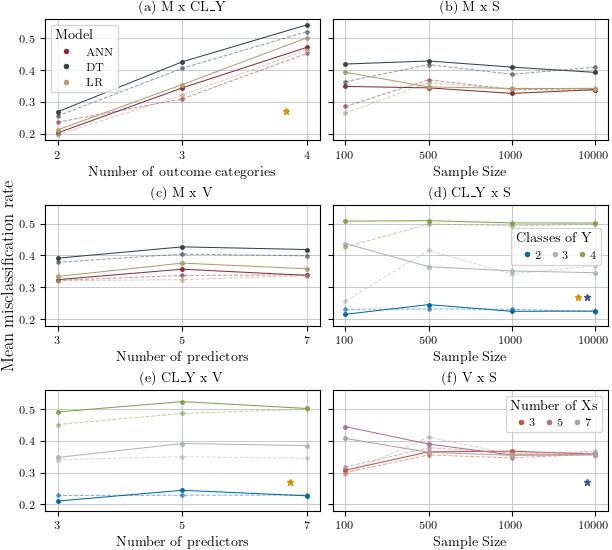

In [9]:
plt.rcParams.update(figsizes.jmlr2001(nrows=3, ncols=2))
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
fig, axs = plt.subplots(3, 2, sharey = True)

# Plot 1: M x CLY
colors=palettes.tue_plot[0:3] # set colors
for i in np.arange(3): 
    axs[0, 0].plot(M_CLY.index, M_CLY.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 0].plot(M_CLY_orig.index, M_CLY_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].set_title('(a) M x CL_Y')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label="ANN")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label="DT")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label="LR")
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[0, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], loc="upper left", title = 'Model', title_fontsize='small', alignment='left')

# Plot 2: M x S
for i in np.arange(3): 
    axs[0, 1].plot(M_S.index, M_S.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 1].plot(M_S_orig.index, M_S_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 1].set_xlabel("Sample Size")
axs[0, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[0, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_title('(b) M x S')

# Plot 3: M x V
for i in np.arange(3): 
    axs[1, 0].plot(M_V.index, M_V.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 0].plot(M_V_orig.index, M_V_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 0].set_xticks([3, 5, 7])  # Positions for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].set_xlabel("Number of predictors")
axs[1, 0].set_title('(c) M x V')

# Plot 4: CLY x S
colors=palettes.tue_plot[3:6] # set colors
for i in np.arange(3): 
    axs[1, 1].plot(np.arange(4), CLY_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 1].plot(np.arange(4), CLY_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 1].set_xlabel("Sample Size")
axs[1, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 1].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[1, 1].set_title('(d) CL_Y x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=5, label="2")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=5, label="3")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=5, label="4")
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[1, 1].legend(handles=[dot_ANN, dot_DT, dot_LR], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes of Y', title_fontsize='small', handletextpad=-0.3, loc="upper left", bbox_to_anchor=(0.63, 0.85))

# Plot 5: CLY x V
for i in np.arange(3): 
    axs[2, 0].plot([3, 5, 7], CLY_V.values[i*3:i*3+3], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 0].plot([3, 5, 7], CLY_V_orig.values[i*3:i*3+3], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 0].set_xlabel("Number of predictors")
axs[2, 0].set_xticks([3, 5, 7])  # Positions for the categories
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].plot(6.73, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].set_title('(e) CL_Y x V')

# Plot 6: V x S
colors=palettes.tue_plot[6:9] # set colors
for i in np.arange(3): 
    axs[2, 1].plot(np.arange(4), V_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 1].plot(np.arange(4), V_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 1].set_xlabel("Sample Size")
axs[2, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[2, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[2, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 1].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[2, 1].set_title('(f) V x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='3')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='5')
dot_LR = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label='7')
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[2, 1].legend(handles=[dot_ANN, dot_DT, dot_LR], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Number of Xs', title_fontsize='small', handletextpad=-0.3, loc="upper right")

fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/02_04_Interactions_cont.pdf")
plt.show()

## Now with categorical predictors (V=3) - Table 4

In [10]:
# read data
table4_orig = pd.read_csv('../dat/table4_orig.csv')
table4_orig['S'] = table4_orig['S'].factorize()[0]
table4 = pd.read_csv('../dat/table4.csv')
table4['Sample_Size'] = table4['Sample_Size'].factorize()[0]

### Figure 5 - Main effects

In [14]:
# Plot 1: CL_Y
by_CLY = table4.groupby('Classes_Dep_Var')[models].mean().mean(axis=1)
by_CLY_orig = table4_orig.groupby('CL_Y')[models].mean().mean(axis=1)
# Plot 2: CL_X
by_CLX = table4.groupby('Classes_Ind_Vars')[models].mean().mean(axis=1)
by_CLX_orig = table4_orig.groupby('CL_X')[models].mean().mean(axis=1)
# Plot 3: S
by_S = table4.groupby('Sample_Size')[models].mean().mean(axis=1)
by_S_orig = table4_orig.groupby('S')[models].mean().mean(axis=1)
# Plot 4: CA
by_CA = table4.groupby('Num_Categorical_Vars')[models].mean().mean(axis=1)
by_CA_orig = table4_orig.groupby('CA')[models].mean().mean(axis=1)
# Plot 4
by_M = table4[models + ['RF']].mean()
by_M_orig = table4_orig[models].mean()

sig = 0.27 # Significance star y-position
alpha_val = 0.5 # opacity level

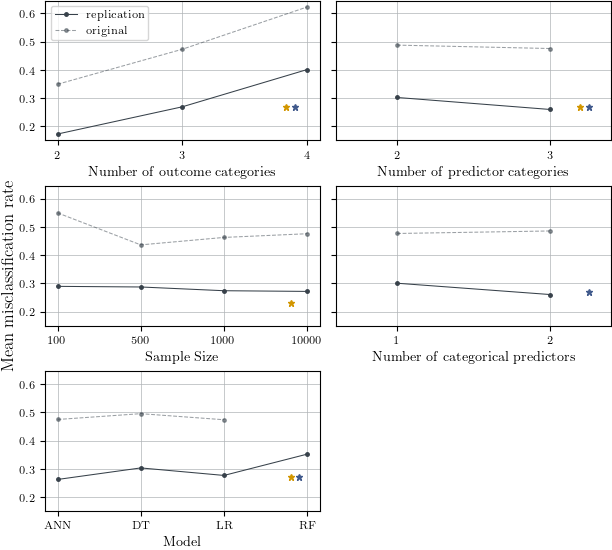

In [15]:
plt.rcParams.update(figsizes.jmlr2001(nrows=3, ncols=2))

fig, axs = plt.subplots(3, 2, sharey = True)

# Plot 1: CLY
axs[0, 0].plot(by_CLY.index, by_CLY.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 0].plot(by_CLY_orig.index, by_CLY_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].plot(3.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 2: CLX
axs[0, 1].plot(by_CLX.index, by_CLX.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 1].plot(by_CLX_orig.index, by_CLX_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].plot(3.2, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 1].plot(3.26, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 3: S
axs[1, 0].plot(by_S.index, by_S.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 0].plot(by_S_orig.index, by_S_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original

# Plot 4: CA
axs[1, 1].plot(by_CA.index, by_CA.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 1].plot(by_CA_orig.index, by_CA_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 1].set_xticks([1, 2])  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
axs[1, 1].set_xlim([0.6, 2.4])
axs[1, 1].plot(2.26, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 5: M
axs[2, 0].plot(by_M.index, by_M.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[2, 0].plot(by_M_orig.index, by_M_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[2, 0].set_xlabel("Model")
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

axs[2, 1].axis('off')

axs[0, 0].legend()
fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/05_mainEffects_V3.pdf")
plt.show()

### Interactions in Case with categorical Xs -- All in one plot

In [16]:
# M x CLY
M_CLY = table4.groupby('Classes_Dep_Var')[models].mean()
M_CLY_orig = table4_orig.groupby(['CL_Y'])[models].mean()
# M x CL_X
M_CLX = table4.groupby('Classes_Ind_Vars')[models].mean()
M_CLX_orig = table4_orig.groupby(['CL_X'])[models].mean()
# M x S
M_S = table4.groupby('Sample_Size')[models].mean()
M_S_orig = table4_orig.groupby(['S'])[models].mean()
# M x CA
M_CA = table4.groupby('Num_Categorical_Vars')[models].mean()
M_CA_orig = table4_orig.groupby(['CA'])[models].mean()
# CLY x CLX
CLY_CLX = table4.groupby(['Classes_Dep_Var', 'Classes_Ind_Vars'])[models].mean().mean(axis=1)
CLY_CLX_orig = table4_orig.groupby(['CL_Y', 'CL_X'])[models].mean().mean(axis=1)
# CLY x S
CLY_S = table4.groupby(['Classes_Dep_Var', 'Sample_Size'])[models].mean().mean(axis=1)
CLY_S_orig = table4_orig.groupby(['CL_Y', 'S'])[models].mean().mean(axis=1)
# CLY x CA
CLY_CA = table4.groupby(['Classes_Dep_Var', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLY_CA_orig = table4_orig.groupby(['CL_Y', 'CA'])[models].mean().mean(axis=1)
# CLX x S
CLX_S = table4.groupby(['Classes_Ind_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CLX_S_orig = table4_orig.groupby(['CL_X', 'S'])[models].mean().mean(axis=1)
# CLX x CA
CLX_CA = table4.groupby(['Classes_Ind_Vars', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLX_CA_orig = table4_orig.groupby(['CL_X', 'CA'])[models].mean().mean(axis=1)
# CA x S
CA_S = table4.groupby(['Num_Categorical_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CA_S_orig = table4_orig.groupby(['CA', 'S'])[models].mean().mean(axis=1)

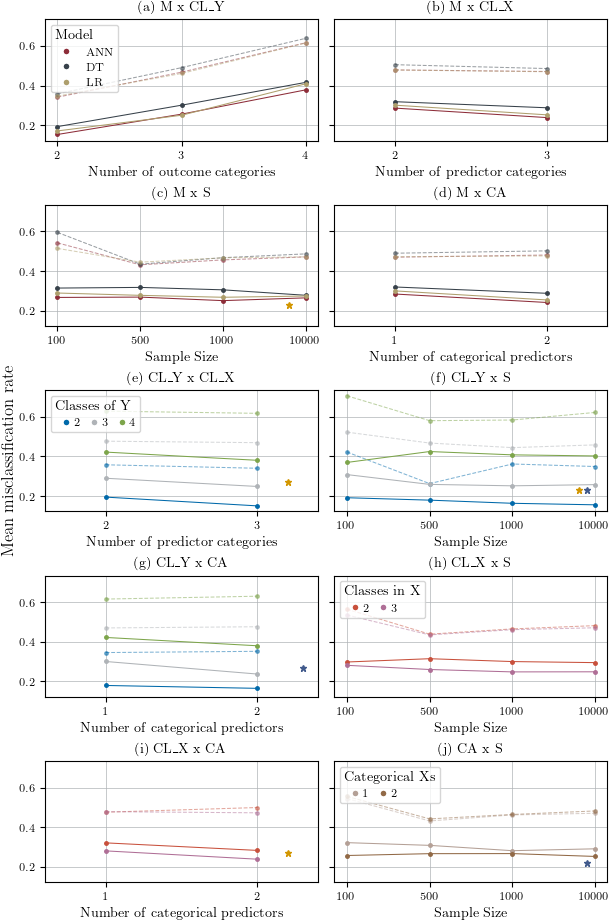

In [17]:
plt.rcParams.update(figsizes.jmlr2001(nrows=5, ncols=2))
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
fig, axs = plt.subplots(5, 2, sharey = True)

# Plot 1: M x CLY
colors=palettes.tue_plot[0:3] # set colors
for i in np.arange(3): 
    axs[0, 0].plot(M_CLY.index, M_CLY.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 0].plot(M_CLY_orig.index, M_CLY_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].set_title('(a) M x CL_Y')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label="ANN")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label="DT")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label="LR")
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[0, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], loc="upper left", title = 'Model', title_fontsize='small', alignment='left')

# Plot 2: M x CLX
for i in np.arange(3): 
    axs[0, 1].plot(M_CLX.index, M_CLX.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 1].plot(M_CLX_orig.index, M_CLX_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].set_title('(b) M x CL_X')

# Plot 3: M x S
for i in np.arange(3): 
    axs[1, 0].plot(M_S.index, M_S.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 0].plot(M_S_orig.index, M_S_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 0].set_title('(c) M x S')

# Plot 4: M x CA
for i in np.arange(3): 
    axs[1, 1].plot(M_CA.index, M_CA.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 1].plot(M_CA_orig.index, M_CA_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 1].set_xticks([1, 2])  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
axs[1, 1].set_xlim([0.6, 2.4])
axs[1, 1].set_title('(d) M x CA')

# Plot 5: CLY x CLX
colors=palettes.tue_plot[3:6] # set colors
for i in np.arange(3): 
    axs[2, 0].plot([2, 3], CLY_CLX.values[i*2:i*2+2], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 0].plot([2, 3], CLY_CLX_orig.values[i*2:i*2+2], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 0].set_xticks([2, 3])  # Positions for the categories
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].set_xlabel("Number of predictor categories")
axs[2, 0].set_xlim([1.6, 3.4])
axs[2, 0].plot(3.2, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].set_title('(e) CL_Y x CL_X')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=5, label="2")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=5, label="3")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=5, label="4")
axs[2, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes of Y', title_fontsize='small', handletextpad=-0.3, loc="upper left")

# Plot 6: CLY x S
for i in np.arange(3): 
    axs[2, 1].plot(np.arange(4), CLY_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 1].plot(np.arange(4), CLY_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 1].set_xlabel("Sample Size")
axs[2, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[2, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[2, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 1].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 1].plot(2.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[2, 1].set_title('(f) CL_Y x S')

# Plot 7: CLY x CA
for i in np.arange(3): 
    axs[3, 0].plot([1, 2], CLY_CA.values[i*2:i*2+2], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 0].plot([1, 2], CLY_CA_orig.values[i*2:i*2+2], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 0].set_xlabel("Number of categorical predictors")
axs[3, 0].set_xticks([1, 2])  # Positions for the categories
axs[3, 0].set_xlim([0.6, 2.4])
axs[3, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 0].plot(2.3, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[3, 0].set_title('(g) CL_Y x CA')

# Plot 8: CLX x S
colors=palettes.tue_plot[6:8] # set colors
for i in np.arange(2): 
    axs[3, 1].plot(np.arange(4), CLX_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 1].plot(np.arange(4), CLX_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 1].set_xlabel("Sample Size")
axs[3, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[3, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[3, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 1].set_title('(h) CL_X x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='2')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='3')
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[3, 1].legend(handles=[dot_ANN, dot_DT], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes in X', title_fontsize='small', handletextpad=-0.3, loc="upper left")
# Plot 9: CLX x CA
for i in np.arange(2): 
    axs[4, 0].plot([1, 2], CLX_CA.values[i*2:i*2+2], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 0].plot([1, 2], CLX_CA_orig.values[i*2:i*2+2], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 0].set_xlabel("Number of categorical predictors")
axs[4, 0].set_xticks([1, 2])  # Positions for the categories
axs[4, 0].set_xlim([0.6, 2.4])
axs[4, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 0].plot(2.2, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[4, 0].set_title('(i) CL_X x CA')

# Plot 10: CA x S
colors=palettes.tue_plot[8:10] # set colors
for i in np.arange(2): 
    axs[4, 1].plot(np.arange(4), CA_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 1].plot(np.arange(4), CA_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 1].set_xlabel("Sample Size")
axs[4, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[4, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[4, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 1].plot(2.9, 0.22, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[4, 1].set_title('(j) CA x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='1')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='2')
axs[4, 1].legend(handles=[dot_ANN, dot_DT], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Categorical Xs', title_fontsize='small', handletextpad=-0.3, loc="upper left")

fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/06_08_Interactions_V3.pdf")
plt.show()

## Now with categorical predictors (V=5) - Table 5

In [18]:
# read data
table5_orig = pd.read_csv('../dat/table5_orig.csv')
table5_orig['S'] = table5_orig['S'].factorize()[0]
table5 = pd.read_csv('../dat/table5.csv')
table5['Sample_Size'] = table5['Sample_Size'].factorize()[0]

### Figure 5 - Main effects

In [19]:
# Plot 1: CL_Y
by_CLY = table5.groupby('Classes_Dep_Var')[models].mean().mean(axis=1)
by_CLY_orig = table5_orig.groupby('CL_Y')[models].mean().mean(axis=1)
# Plot 2: CL_X
by_CLX = table5.groupby('Classes_Ind_Vars')[models].mean().mean(axis=1)
by_CLX_orig = table5_orig.groupby('CL_X')[models].mean().mean(axis=1)
# Plot 3: S
by_S = table5.groupby('Sample_Size')[models].mean().mean(axis=1)
by_S_orig = table5_orig.groupby('S')[models].mean().mean(axis=1)
# Plot 4: CA
by_CA = table5.groupby('Num_Categorical_Vars')[models].mean().mean(axis=1)
by_CA_orig = table5_orig.groupby('CA')[models].mean().mean(axis=1)
# Plot 4
by_M = table5[models + ['RF']].mean()
by_M_orig = table5_orig[models].mean()

sig = 0.27 # Significance star y-position
alpha_val = 0.5 # opacity level

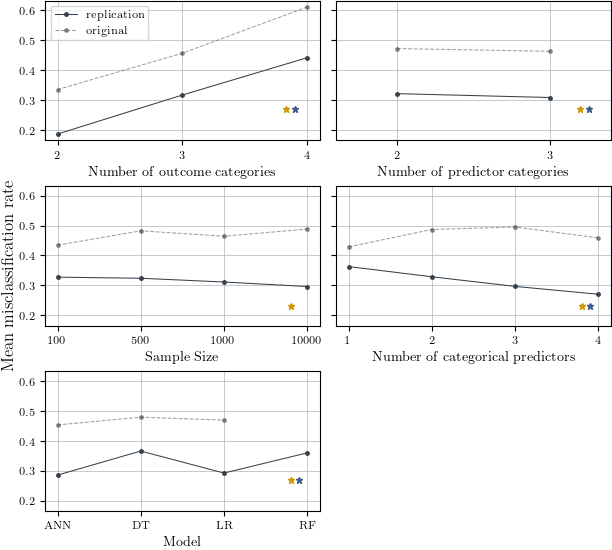

In [20]:
plt.rcParams.update(figsizes.jmlr2001(nrows=3, ncols=2))

fig, axs = plt.subplots(3, 2, sharey = True)

# Plot 1: CLY
axs[0, 0].plot(by_CLY.index, by_CLY.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 0].plot(by_CLY_orig.index, by_CLY_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].plot(3.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 2: CLX
axs[0, 1].plot(by_CLX.index, by_CLX.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 1].plot(by_CLX_orig.index, by_CLX_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].plot(3.2, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 1].plot(3.26, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 3: S
axs[1, 0].plot(by_S.index, by_S.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 0].plot(by_S_orig.index, by_S_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original

# Plot 4: CA
axs[1, 1].plot(by_CA.index, by_CA.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 1].plot(by_CA_orig.index, by_CA_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 1].set_xticks(np.arange(5))  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
# axs[1, 1].set_xlim([0.6, 2.4])
axs[1, 1].plot(3.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 1].plot(3.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 5: M
axs[2, 0].plot(by_M.index, by_M.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[2, 0].plot(by_M_orig.index, by_M_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[2, 0].set_xlabel("Model")
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

axs[2, 1].axis('off')

axs[0, 0].legend()
fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/09_mainEffects_V5.pdf")
plt.show()

### Interactions in Case with categorical Xs -- All in one plot

In [21]:
# M x CLY
M_CLY = table5.groupby('Classes_Dep_Var')[models].mean()
M_CLY_orig = table5_orig.groupby(['CL_Y'])[models].mean()
# M x CL_X
M_CLX = table5.groupby('Classes_Ind_Vars')[models].mean()
M_CLX_orig = table5_orig.groupby(['CL_X'])[models].mean()
# M x S
M_S = table5.groupby('Sample_Size')[models].mean()
M_S_orig = table5_orig.groupby(['S'])[models].mean()
# M x CA
M_CA = table5.groupby('Num_Categorical_Vars')[models].mean()
M_CA_orig = table5_orig.groupby(['CA'])[models].mean()
# CLY x CLX
CLY_CLX = table5.groupby(['Classes_Dep_Var', 'Classes_Ind_Vars'])[models].mean().mean(axis=1)
CLY_CLX_orig = table5_orig.groupby(['CL_Y', 'CL_X'])[models].mean().mean(axis=1)
# CLY x S
CLY_S = table5.groupby(['Classes_Dep_Var', 'Sample_Size'])[models].mean().mean(axis=1)
CLY_S_orig = table5_orig.groupby(['CL_Y', 'S'])[models].mean().mean(axis=1)
# CLY x CA
CLY_CA = table5.groupby(['Classes_Dep_Var', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLY_CA_orig = table5_orig.groupby(['CL_Y', 'CA'])[models].mean().mean(axis=1)
# CLX x S
CLX_S = table5.groupby(['Classes_Ind_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CLX_S_orig = table5_orig.groupby(['CL_X', 'S'])[models].mean().mean(axis=1)
# CLX x CA
CLX_CA = table5.groupby(['Classes_Ind_Vars', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLX_CA_orig = table5_orig.groupby(['CL_X', 'CA'])[models].mean().mean(axis=1)
# CA x S
CA_S = table5.groupby(['Num_Categorical_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CA_S_orig = table5_orig.groupby(['CA', 'S'])[models].mean().mean(axis=1)

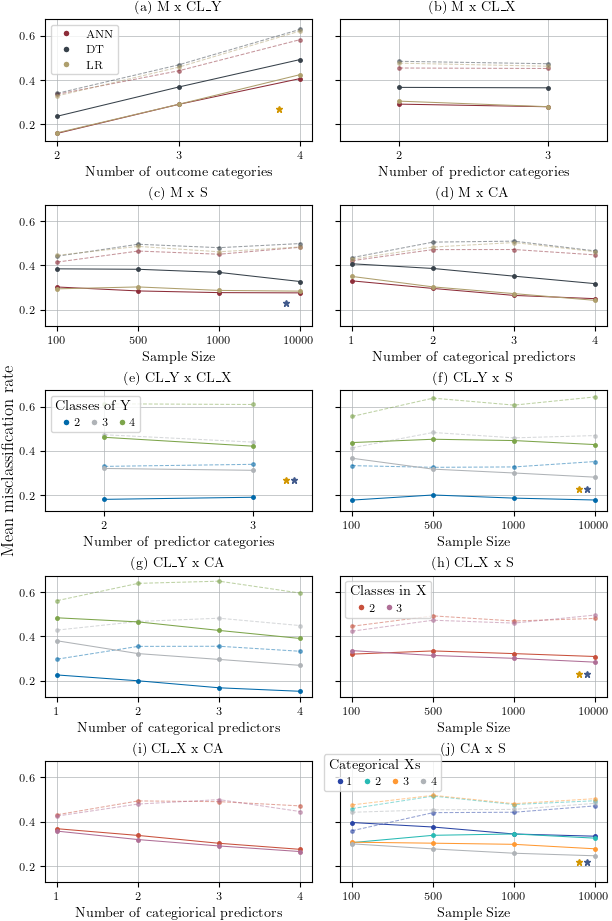

In [22]:
plt.rcParams.update(figsizes.jmlr2001(nrows=5, ncols=2))
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
fig, axs = plt.subplots(5, 2, sharey = True)

# Plot 1: M x CLY
colors=palettes.tue_plot[0:3] # set colors
for i in np.arange(3): 
    axs[0, 0].plot(M_CLY.index, M_CLY.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 0].plot(M_CLY_orig.index, M_CLY_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].set_title('(a) M x CL_Y')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label="ANN")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label="DT")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label="LR")
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[0, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], loc="upper left", title_fontsize='small', alignment='left')

# Plot 2: M x CLX
for i in np.arange(3): 
    axs[0, 1].plot(M_CLX.index, M_CLX.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 1].plot(M_CLX_orig.index, M_CLX_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].set_title('(b) M x CL_X')

# Plot 3: M x S
for i in np.arange(3): 
    axs[1, 0].plot(M_S.index, M_S.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 0].plot(M_S_orig.index, M_S_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.83, 0.23, '*', ms=5, color=rgb.tue_darkblue) # replication
axs[1, 0].set_title('(c) M x S')

# Plot 4: M x CA
for i in np.arange(3): 
    axs[1, 1].plot(M_CA.index, M_CA.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 1].plot(M_CA_orig.index, M_CA_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 1].set_xticks(np.arange(1, 5))  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
axs[1, 1].set_title('(d) M x CA')

# Plot 5: CLY x CLX
colors=palettes.tue_plot[3:6] # set colors
for i in np.arange(3): 
    axs[2, 0].plot([2, 3], CLY_CLX.values[i*2:i*2+2], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 0].plot([2, 3], CLY_CLX_orig.values[i*2:i*2+2], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 0].set_xticks([2, 3])  # Positions for the categories
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].set_xlabel("Number of predictor categories")
axs[2, 0].set_xlim([1.6, 3.4])
axs[2, 0].plot(3.22, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].plot(3.28, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[2, 0].set_title('(e) CL_Y x CL_X')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=5, label="2")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=5, label="3")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=5, label="4")
axs[2, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes of Y', title_fontsize='small', handletextpad=-0.3, loc="upper left")

# Plot 6: CLY x S
for i in np.arange(3): 
    axs[2, 1].plot(np.arange(4), CLY_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 1].plot(np.arange(4), CLY_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 1].set_xlabel("Sample Size")
axs[2, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[2, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[2, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 1].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 1].plot(2.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[2, 1].set_title('(f) CL_Y x S')

# Plot 7: CLY x CA
for i in np.arange(3): 
    axs[3, 0].plot(np.arange(1, 5), CLY_CA.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 0].plot(np.arange(1, 5), CLY_CA_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 0].set_xlabel("Number of categorical predictors")
axs[3, 0].set_xticks(np.arange(1, 5))  # Positions for the categories
axs[3, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 0].set_title('(g) CL_Y x CA')

# Plot 8: CLX x S
colors=palettes.tue_plot[6:8] # set colors
for i in np.arange(2): 
    axs[3, 1].plot(np.arange(4), CLX_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 1].plot(np.arange(4), CLX_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 1].set_xlabel("Sample Size")
axs[3, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[3, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[3, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 1].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[3, 1].plot(2.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[3, 1].set_title('(h) CL_X x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='2')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='3')
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[3, 1].legend(handles=[dot_ANN, dot_DT], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes in X', title_fontsize='small', handletextpad=-0.3, loc="upper left")
# Plot 9: CLX x CA
for i in np.arange(2): 
    axs[4, 0].plot(np.arange(1, 5), CLX_CA.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 0].plot(np.arange(1, 5), CLX_CA_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 0].set_xlabel("Number of categiorical predictors")
axs[4, 0].set_xticks(np.arange(1, 5))  # Positions for the categories
axs[4, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 0].set_title('(i) CL_X x CA')

# Plot 10: CA x S
colors=palettes.pn[:4] # set colors
for i in np.arange(4): 
    axs[4, 1].plot(np.arange(4), CA_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 1].plot(np.arange(4), CA_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 1].set_xlabel("Sample Size")
axs[4, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[4, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[4, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 1].plot(2.8, 0.22, '*', ms=5, color=rgb.tue_orange) # original
axs[4, 1].plot(2.9, 0.22, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[4, 1].set_title('(j) CA x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='1')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='2')
dot_3 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label='3')
dot_4 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[3], markersize=5, label='4')
axs[4, 1].legend(handles=[dot_ANN, dot_DT, dot_3, dot_4], ncols=4, alignment='left', columnspacing=0.25, 
                 title = 'Categorical Xs', title_fontsize='small', handletextpad=-0.3, loc="upper left", bbox_to_anchor=(-0.08, 1.1))

fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/10_14_Interactions_V5.pdf")
plt.show()

## Now with categorical predictors (V=7) - Table 6

In [23]:
# read data
table6_orig = pd.read_csv('../dat/table6_orig.csv')
table6_orig['S'] = table6_orig['S'].factorize()[0]
table6 = pd.read_csv('../dat/table6.csv')
table6['Sample_Size'] = table6['Sample_Size'].factorize()[0]

### Figure 5 - Main effects

In [24]:
# Plot 1: CL_Y
by_CLY = table6.groupby('Classes_Dep_Var')[models].mean().mean(axis=1)
by_CLY_orig = table6_orig.groupby('CL_Y')[models].mean().mean(axis=1)
# Plot 2: CL_X
by_CLX = table6.groupby('Classes_Ind_Vars')[models].mean().mean(axis=1)
by_CLX_orig = table6_orig.groupby('CL_X')[models].mean().mean(axis=1)
# Plot 3: S
by_S = table6.groupby('Sample_Size')[models].mean().mean(axis=1)
by_S_orig = table6_orig.groupby('S')[models].mean().mean(axis=1)
# Plot 4: CA
by_CA = table6.groupby('Num_Categorical_Vars')[models].mean().mean(axis=1)
by_CA_orig = table6_orig.groupby('CA')[models].mean().mean(axis=1)
# Plot 4
by_M = table6[models + ['RF']].mean()
by_M_orig = table6_orig[models].mean()

sig = 0.23 # Significance star y-position
alpha_val = 0.5 # opacity level

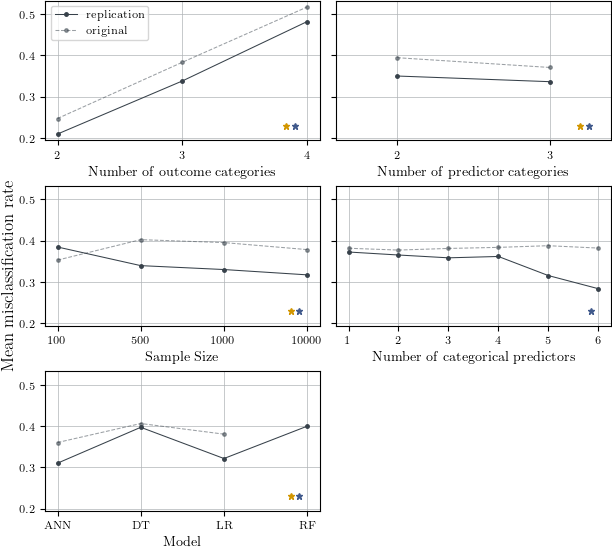

In [25]:
plt.rcParams.update(figsizes.jmlr2001(nrows=3, ncols=2))

fig, axs = plt.subplots(3, 2, sharey = True)

# Plot 1: CLY
axs[0, 0].plot(by_CLY.index, by_CLY.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 0].plot(by_CLY_orig.index, by_CLY_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].plot(3.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 2: CLX
axs[0, 1].plot(by_CLX.index, by_CLX.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[0, 1].plot(by_CLX_orig.index, by_CLX_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].plot(3.2, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 1].plot(3.26, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 3: S
axs[1, 0].plot(by_S.index, by_S.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 0].plot(by_S_orig.index, by_S_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 0].plot(2.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 4: CA
axs[1, 1].plot(by_CA.index, by_CA.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[1, 1].plot(by_CA_orig.index, by_CA_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[1, 1].set_xticks(np.arange(7))  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
axs[1, 1].plot(5.85, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication

# Plot 5: M
axs[2, 0].plot(by_M.index, by_M.values, '.-', ms=5, lw=0.75, color=rgb.tue_dark, label="replication") 
axs[2, 0].plot(by_M_orig.index, by_M_orig.values, '.--', ms=5, lw=0.75, color=rgb.tue_dark, alpha=alpha_val, label="original")
axs[2, 0].set_xlabel("Model")
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 0].plot(2.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication

axs[2, 1].axis('off')

axs[0, 0].legend()
fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/15_mainEffects_V7.pdf")
plt.show()

### Interactions in Case with categorical Xs -- All in one plot

In [26]:
# M x CLY
M_CLY = table6.groupby('Classes_Dep_Var')[models].mean()
M_CLY_orig = table6_orig.groupby(['CL_Y'])[models].mean()
# M x CL_X
M_CLX = table6.groupby('Classes_Ind_Vars')[models].mean()
M_CLX_orig = table6_orig.groupby(['CL_X'])[models].mean()
# M x S
M_S = table6.groupby('Sample_Size')[models].mean()
M_S_orig = table6_orig.groupby(['S'])[models].mean()
# M x CA
M_CA = table6.groupby('Num_Categorical_Vars')[models].mean()
M_CA_orig = table6_orig.groupby(['CA'])[models].mean()
# CLY x CLX
CLY_CLX = table6.groupby(['Classes_Dep_Var', 'Classes_Ind_Vars'])[models].mean().mean(axis=1)
CLY_CLX_orig = table6_orig.groupby(['CL_Y', 'CL_X'])[models].mean().mean(axis=1)
# CLY x S
CLY_S = table6.groupby(['Classes_Dep_Var', 'Sample_Size'])[models].mean().mean(axis=1)
CLY_S_orig = table6_orig.groupby(['CL_Y', 'S'])[models].mean().mean(axis=1)
# CLY x CA
CLY_CA = table6.groupby(['Classes_Dep_Var', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLY_CA_orig = table6_orig.groupby(['CL_Y', 'CA'])[models].mean().mean(axis=1)
# CLX x S
CLX_S = table6.groupby(['Classes_Ind_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CLX_S_orig = table6_orig.groupby(['CL_X', 'S'])[models].mean().mean(axis=1)
# CLX x CA
CLX_CA = table6.groupby(['Classes_Ind_Vars', 'Num_Categorical_Vars'])[models].mean().mean(axis=1)
CLX_CA_orig = table6_orig.groupby(['CL_X', 'CA'])[models].mean().mean(axis=1)
# CA x S
CA_S = table6.groupby(['Num_Categorical_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
CA_S_orig = table6_orig.groupby(['CA', 'S'])[models].mean().mean(axis=1)

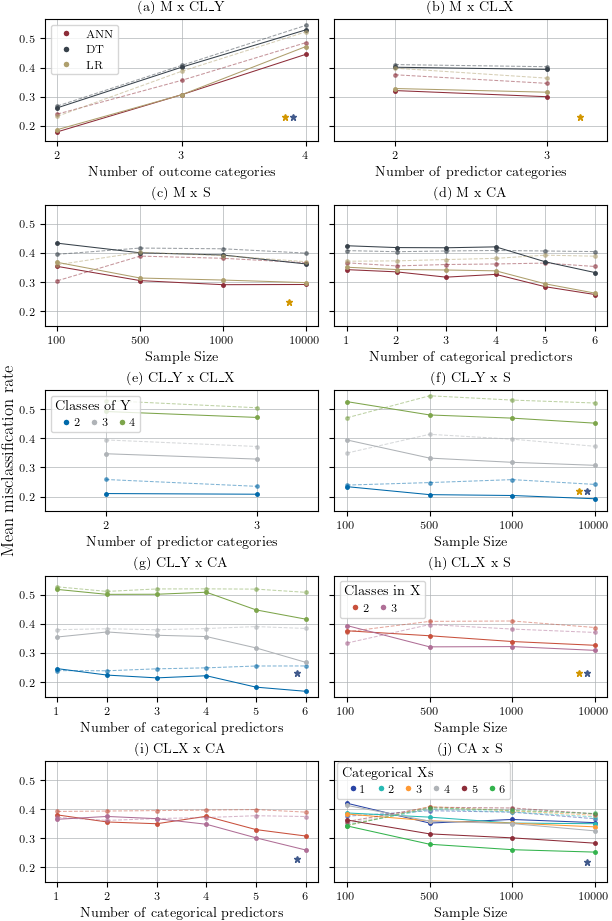

In [27]:
plt.rcParams.update(figsizes.jmlr2001(nrows=5, ncols=2))
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
fig, axs = plt.subplots(5, 2, sharey = True)

# Plot 1: M x CLY
colors=palettes.tue_plot[0:3] # set colors
for i in np.arange(3): 
    axs[0, 0].plot(M_CLY.index, M_CLY.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 0].plot(M_CLY_orig.index, M_CLY_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Number of outcome categories")
axs[0, 0].plot(3.83, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 0].plot(3.9, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[0, 0].set_title('(a) M x CL_Y')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label="ANN")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label="DT")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label="LR")
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[0, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], loc="upper left", title_fontsize='small', alignment='left')

# Plot 2: M x CLX
for i in np.arange(3): 
    axs[0, 1].plot(M_CLX.index, M_CLX.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 1].plot(M_CLX_orig.index, M_CLX_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[0, 1].set_xticks([2, 3])  # Positions for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 1].set_xlabel("Number of predictor categories")
axs[0, 1].set_xlim([1.6, 3.4])
axs[0, 1].plot(3.22, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[0, 1].set_title('(b) M x CL_X')

# Plot 3: M x S
for i in np.arange(3): 
    axs[1, 0].plot(M_S.index, M_S.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 0].plot(M_S_orig.index, M_S_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 0].set_xlabel("Sample Size")
axs[1, 0].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 0].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].plot(2.8, sig, '*', ms=5, color=rgb.tue_orange) # original
axs[1, 0].set_title('(c) M x S')

# Plot 4: M x CA
for i in np.arange(3): 
    axs[1, 1].plot(M_CA.index, M_CA.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 1].plot(M_CA_orig.index, M_CA_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[1, 1].set_xticks(np.arange(1, 7))  # Positions for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 1].set_xlabel("Number of categorical predictors")
axs[1, 1].set_title('(d) M x CA')

# Plot 5: CLY x CLX
colors=palettes.tue_plot[3:6] # set colors
for i in np.arange(3): 
    axs[2, 0].plot([2, 3], CLY_CLX.values[i*2:i*2+2], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 0].plot([2, 3], CLY_CLX_orig.values[i*2:i*2+2], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 0].set_xticks([2, 3])  # Positions for the categories
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 0].set_xlabel("Number of predictor categories")
axs[2, 0].set_xlim([1.6, 3.4])
axs[2, 0].set_title('(e) CL_Y x CL_X')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=5, label="2")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=5, label="3")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=5, label="4")
axs[2, 0].legend(handles=[dot_ANN, dot_DT, dot_LR], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes of Y', title_fontsize='small', handletextpad=-0.3, loc="upper left")

# Plot 6: CLY x S
for i in np.arange(3): 
    axs[2, 1].plot(np.arange(4), CLY_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 1].plot(np.arange(4), CLY_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[2, 1].set_xlabel("Sample Size")
axs[2, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[2, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[2, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[2, 1].plot(2.8, 0.22, '*', ms=5, color=rgb.tue_orange) # original
axs[2, 1].plot(2.9, 0.22, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[2, 1].set_title('(f) CL_Y x S')

# Plot 7: CLY x CA
for i in np.arange(3): 
    axs[3, 0].plot(np.arange(1, 7), CLY_CA.values[i*6:i*6+6], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 0].plot(np.arange(1, 7), CLY_CA_orig.values[i*6:i*6+6], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 0].set_xlabel("Number of categorical predictors")
axs[3, 0].set_xticks(np.arange(1, 7))  # Positions for the categories
axs[3, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 0].plot(5.83, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[3, 0].set_title('(g) CL_Y x CA')

# Plot 8: CLX x S
colors=palettes.tue_plot[6:8] # set colors
for i in np.arange(2): 
    axs[3, 1].plot(np.arange(4), CLX_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[3, 1].plot(np.arange(4), CLX_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[3, 1].set_xlabel("Sample Size")
axs[3, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[3, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[3, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[3, 1].plot(2.8, 0.23, '*', ms=5, color=rgb.tue_orange) # original
axs[3, 1].plot(2.9, 0.23, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[3, 1].set_title('(h) CL_X x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='2')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='3')
# line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
# line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")
axs[3, 1].legend(handles=[dot_ANN, dot_DT], ncols=3, alignment='left', columnspacing=0.25, 
                 title = 'Classes in X', title_fontsize='small', handletextpad=-0.3, loc="upper left")
# Plot 9: CLX x CA
for i in np.arange(2): 
    axs[4, 0].plot(np.arange(1, 7), CLX_CA.values[i*6:i*6+6], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 0].plot(np.arange(1, 7), CLX_CA_orig.values[i*6:i*6+6], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 0].set_xlabel("Number of categorical predictors")
axs[4, 0].set_xticks(np.arange(1, 7))  # Positions for the categories
axs[4, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 0].plot(5.83, sig, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[4, 0].set_title('(i) CL_X x CA')

# Plot 10: CA x S
colors=np.vstack([palettes.pn, [0.2, 0.7, 0.3]])
 # set colors
for i in np.arange(6): 
    axs[4, 1].plot(np.arange(4), CA_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[4, 1].plot(np.arange(4), CA_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=alpha_val, label="original")
axs[4, 1].set_xlabel("Sample Size")
axs[4, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[4, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[4, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[4, 1].plot(2.9, 0.22, '*', ms=5, color=rgb.tue_darkblue)   # replication
axs[4, 1].set_title('(j) CA x S')

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[0], markersize=5, label='1')
dot_DT = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[1], markersize=5, label='2')
dot_3 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[2], markersize=5, label='3')
dot_4 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[3], markersize=5, label='4')
dot_5 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[4], markersize=5, label='5')
dot_6 = plt.Line2D([0], [0], marker='o', color='w', lw=0, markerfacecolor=colors[5], markersize=5, label='6')
axs[4, 1].legend(handles=[dot_ANN, dot_DT, dot_3, dot_4, dot_5, dot_6], ncols=6, alignment='left', columnspacing=0.25, 
                 title = 'Categorical Xs', title_fontsize='small', handletextpad=-0.3, loc="upper left", bbox_to_anchor=(-0.01, 1.035))

fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/16_20_Interactions_V7.pdf")
plt.show()